In [1]:
import warnings
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score,confusion_matrix,accuracy_score,classification_report,plot_confusion_matrix

In [2]:
df=pd.read_csv(r"D:\Nihal Kumar\Study_Notes\Part_1_GL\Practice\Projects\Log_Reg\Mobile-data-train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [5]:
pd.value_counts(df['price_range'])

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
missing_values = df.isnull().sum()
missing_values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

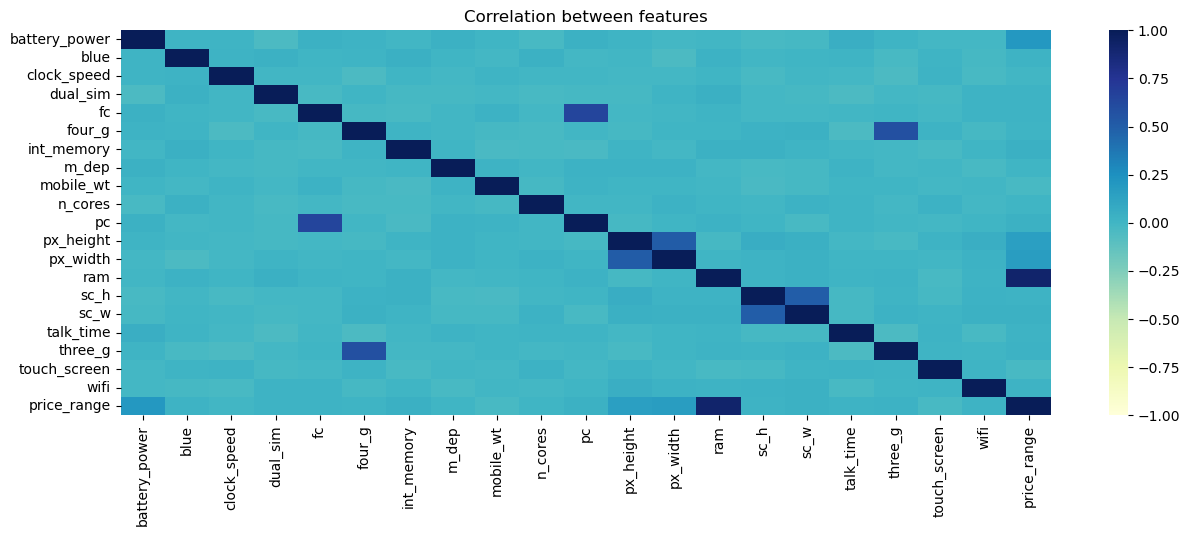

In [8]:
corr = df.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, cmap= 'YlGnBu', vmax= 1.0,vmin=-1.0)
plt.title('Correlation between features')
plt.show()

In [9]:
pd.crosstab(df['ram'],df['price_range'])

price_range,0,1,2,3
ram,,,,
256,1,0,0,0
258,2,0,0,0
259,1,0,0,0
262,1,0,0,0
263,1,0,0,0
...,...,...,...,...
3990,0,0,0,1
3991,0,0,0,2
3993,0,0,0,1


<AxesSubplot:>

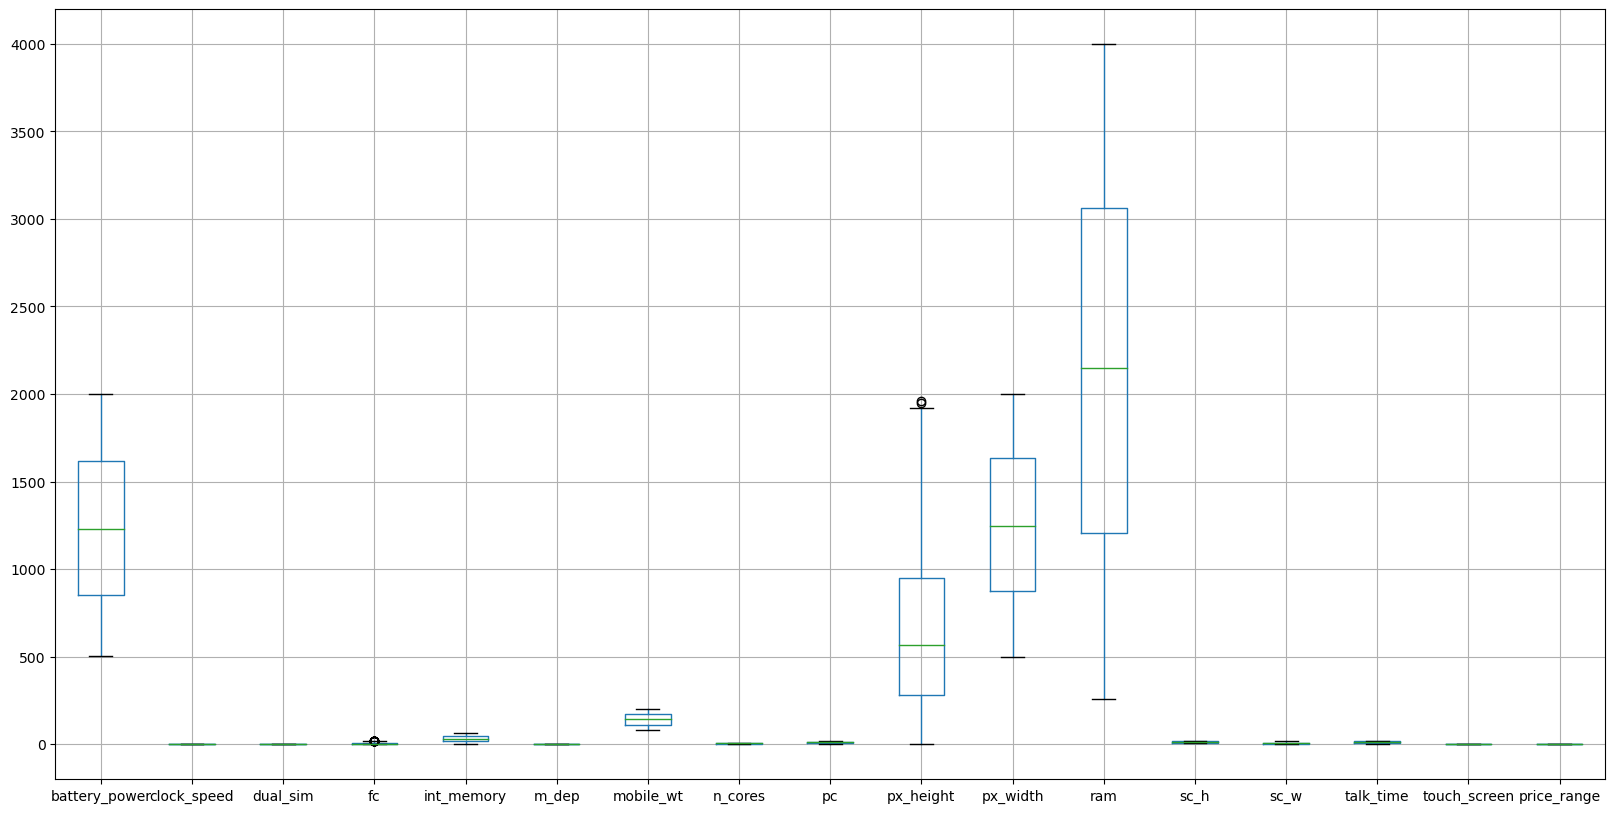

In [10]:
df.boxplot(column= ['battery_power','clock_speed','dual_sim','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time','touch_screen','price_range'],figsize = (20,10))

In [11]:
df['px_height'].describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

In [12]:
x = df.iloc[:,:20]
y = df['price_range']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)

(1400, 20)
(600, 20)


In [13]:
x.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0


In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(x_train,y_train)

C:\Users\uie72014\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [15]:
y_pred = model.predict(x_test)
y_pred

array([0, 2, 0, 3, 1, 2, 2, 0, 3, 3, 0, 1, 2, 3, 2, 1, 2, 2, 1, 0, 0, 1,
       0, 2, 1, 1, 3, 3, 2, 0, 1, 0, 3, 0, 2, 3, 2, 1, 3, 0, 1, 2, 3, 0,
       3, 3, 3, 1, 3, 1, 3, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 3, 2, 2, 2, 0,
       3, 3, 1, 1, 2, 1, 0, 1, 2, 0, 0, 3, 1, 1, 3, 2, 1, 0, 1, 3, 2, 3,
       3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 2, 1, 0, 1, 0, 0, 1, 3, 3, 0, 0, 1,
       0, 0, 3, 3, 2, 1, 3, 3, 0, 2, 1, 3, 2, 2, 3, 3, 0, 3, 0, 2, 3, 0,
       2, 2, 0, 2, 1, 0, 0, 2, 3, 1, 3, 3, 0, 0, 1, 2, 1, 2, 3, 1, 1, 0,
       2, 3, 0, 1, 0, 1, 3, 3, 2, 2, 1, 0, 0, 2, 1, 3, 3, 1, 0, 0, 3, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 3, 2, 0, 2, 0, 0, 0, 0, 2, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 1, 2, 3, 3, 1, 3, 0, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 2, 3, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 3, 2, 1, 0, 2, 3, 1, 3, 3,
       2, 3, 0, 3, 2, 2, 3, 3, 3, 1, 1, 3, 2, 1, 3, 3, 3, 3, 3, 0, 2, 2,
       2, 2, 3, 0, 3, 3, 2, 2, 2, 0, 1, 2, 0, 2, 3, 1, 3, 1, 1, 3, 0, 3,
       0, 0, 3, 0, 1, 2, 3, 2, 2, 0, 1, 0, 0, 3, 3,

In [16]:
accuracy_score(y_test, y_pred)

0.635

In [17]:
print(classification_report(y_test,y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       151
           1       0.52      0.51      0.51       146
           2       0.51      0.53      0.52       148
           3       0.71      0.74      0.72       155

    accuracy                           0.64       600
   macro avg       0.64      0.63      0.63       600
weighted avg       0.64      0.64      0.64       600



<AxesSubplot:>

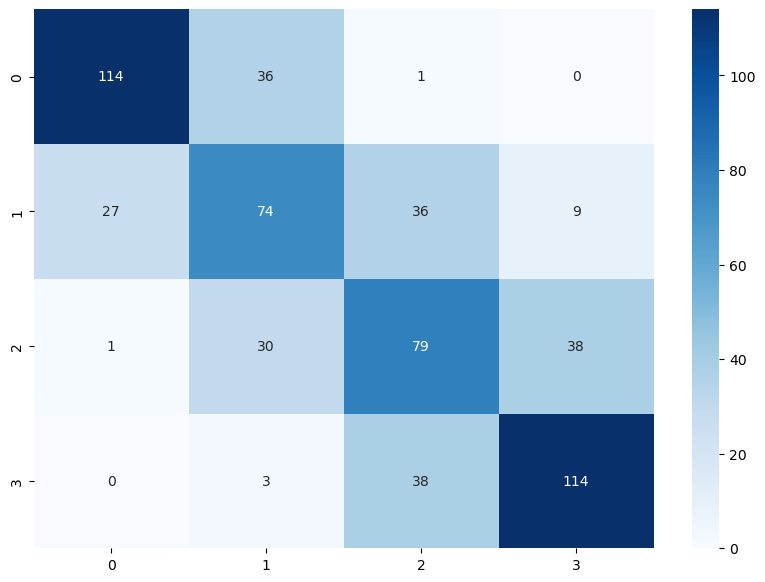

In [18]:
conf_mat = confusion_matrix(y_test,y_pred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot = True, cmap = 'Blues',fmt = 'g')

In [20]:
from scipy.stats import zscore

In [21]:
xtrainsc = x_train.apply(zscore)
xtestsc = x_test.apply(zscore)

In [22]:
model1 = LogisticRegression(random_state = 0 )
model1.fit(xtrainsc,y_train)

LogisticRegression(random_state=0)

In [23]:
model1.score(xtrainsc,y_train)

0.9764285714285714

In [24]:
model1.score(xtestsc,y_test)

0.9616666666666667

In [25]:
ypred = model1.predict(xtestsc)

<AxesSubplot:>

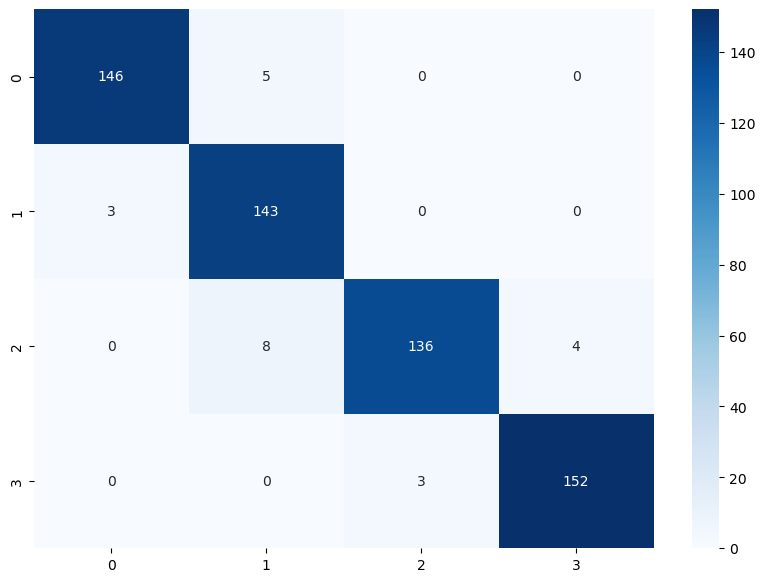

In [26]:
conf_mat = confusion_matrix(y_test,ypred)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot= True,cmap = 'Blues',fmt='g')

In [27]:
model1.classes_

array([0, 1, 2, 3], dtype=int64)

In [28]:
model1.intercept_

array([-3.08710844,  3.07267271,  3.01154574, -2.99711001])

In [29]:
xtestsc.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1860,0.955854,-0.996672,1.241164,-0.954373,-0.321799,0.986754,-0.368855,0.379897,1.706395,-1.065254,-0.803987,-0.989089,0.789705,-1.323552,-1.099571,-0.008092,-0.029018,0.569652,1.0,-1.051315
353,-0.121343,-0.996672,-1.276836,-0.954373,0.591106,0.986754,-1.319895,0.034012,-0.037455,1.583168,0.980848,-0.847594,-0.636416,0.399261,1.535567,2.535160,1.452748,0.569652,-1.0,-1.051315


In [30]:
model1.coef_

array([[-2.59912767e+00,  4.05587152e-02,  1.22144707e-01,
         1.10047789e-01, -8.87067978e-02, -1.38342799e-02,
        -2.05756490e-01,  6.22005229e-02,  3.91115798e-01,
        -5.41981252e-02,  1.94562323e-02, -1.53268998e+00,
        -1.45301820e+00, -1.03693293e+01, -1.43736994e-02,
        -6.51939588e-02, -4.54990015e-02, -8.06139079e-02,
         6.32555760e-02,  5.49105094e-02],
       [-8.59875806e-01, -2.24420882e-02, -9.41895577e-03,
        -1.69732565e-02,  1.80352034e-02,  3.70876336e-02,
        -3.70316488e-02,  1.72412824e-01,  1.73341549e-01,
        -8.68294518e-02, -2.66983719e-02, -4.10954795e-01,
        -5.31868238e-01, -3.28130647e+00, -6.06328666e-02,
        -7.78854228e-02, -4.51532826e-02, -2.39063616e-02,
        -1.22551254e-03,  1.00852983e-01],
       [ 8.31834302e-01, -3.48848683e-03, -4.67694352e-02,
        -8.93667974e-02,  5.69908825e-02, -6.52403664e-02,
        -4.54878883e-02, -8.75395819e-02, -5.81960275e-02,
         1.90903023e-02,  3.1